In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("bank_customer_train.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5001.026625,1.569089e+07,630.804875,42.988125,4.567375,100569.286116,1.534250,0.702750,0.516875,100103.554906,0.204000
std,2879.566761,7.187306e+04,59.076984,7.515870,1.272758,31431.771836,0.582554,0.457076,0.499746,24511.460933,0.402994
min,1.000000,1.556571e+07,446.000000,28.000000,2.000000,62397.410000,1.000000,0.000000,0.000000,57522.070000,0.000000
25%,2500.750000,1.562882e+07,590.000000,38.000000,4.000000,62397.410000,1.000000,0.000000,0.000000,79216.925000,0.000000
50%,5014.000000,1.569017e+07,631.000000,42.000000,5.000000,111118.600000,1.000000,1.000000,1.000000,100056.110000,0.000000
75%,7474.250000,1.575398e+07,672.000000,47.000000,6.000000,126500.100000,2.000000,1.000000,1.000000,121104.542500,0.000000
max,9999.000000,1.581569e+07,753.000000,81.000000,7.000000,188500.680000,4.000000,1.000000,1.000000,142481.990000,1.000000


In [5]:
data["Exited"].value_counts()

0    6368
1    1632
Name: Exited, dtype: int64

In [6]:
data_corr = data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(data_corr, cmap='YlGnBu')

In [7]:
data_corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.009613,0.013601,0.016569,0.007163,0.005026,-0.006705,0.003179,0.003316,0.027600,0.004003
CustomerId,0.009613,1.000000,0.000929,-0.006874,0.002657,-0.003853,0.003545,0.003356,-0.006845,-0.000375,-0.001401
CreditScore,0.013601,0.000929,1.000000,0.002744,0.002374,0.001024,0.008050,-0.013454,0.026846,-0.004503,-0.024877
Age,0.016569,-0.006874,0.002744,1.000000,-0.005595,0.036458,-0.028103,-0.009543,0.096660,-0.004913,0.284937
Tenure,0.007163,0.002657,0.002374,-0.005595,1.000000,-0.013555,0.007594,0.024330,-0.019281,0.001388,-0.015832
Balance,0.005026,-0.003853,0.001024,0.036458,-0.013555,1.000000,-0.299640,-0.014920,-0.015470,0.021139,0.120387
NumOfProducts,-0.006705,0.003545,0.008050,-0.028103,0.007594,-0.299640,1.000000,0.000679,0.010682,0.008099,-0.048936
HasCrCard,0.003179,0.003356,-0.013454,-0.009543,0.024330,-0.014920,0.000679,1.000000,-0.007592,-0.020165,-0.006711
IsActiveMember,0.003316,-0.006845,0.026846,0.096660,-0.019281,-0.015470,0.010682,-0.007592,1.000000,-0.011354,-0.158626
EstimatedSalary,0.027600,-0.000375,-0.004503,-0.004913,0.001388,0.021139,0.008099,-0.020165,-0.011354,1.000000,0.007740


In [57]:
len(pd.unique(data['RowNumber']))==len(data["RowNumber"])

True

In [58]:
len(pd.unique(data['CustomerId']))==len(data["CustomerId"])

True

### categorical feature target observe

In [9]:
def target_base_on_feature_type(df,feature_name,target_name):
    feature_type = pd.unique(df[feature_name])
    target_feature_type = {}
    for i in range(len(feature_type)):
        target_feature_type[feature_type[i]] = {}
        total_exit = sum(df[df[feature_name]==feature_type[i]][target_name])
        target_feature_type[feature_type[i]]['1'] = total_exit
        target_feature_type[feature_type[i]]['0'] = len(df[df[feature_name]==feature_type[i]][target_name])-total_exit
    return target_feature_type

In [55]:
feature_name = list(data.columns)
feature_name_2 = feature_name.copy()
feature_name_2.remove('Surname')
feature_name_2.remove('RowNumber')
feature_name_2.remove('CustomerId')
feature_name_2.remove('CreditScore')
feature_name_2.remove('Age')
feature_name_2.remove('Balance')
feature_name_2.remove('EstimatedSalary')
feature_name_2.remove('Exited')

In [56]:
for i in range(len(feature_name_2)):
    feature_target = target_base_on_feature_type(data, feature_name_2[i], 'Exited')
    print(feature_name_2[i])
    print(pd.DataFrame(feature_target))

Geography
      0     1     2
0  3361  1369  1638
1   645   649   338
Gender
      0     1
0  2721  3647
1   908   724
Tenure
     2     3     4     5     6    7
0  258  1304  1250  1927  1316  313
1   81   344   335   459   331   82
NumOfProducts
      1     2    3   4
0  2910  3422   36   0
1  1129   275  179  49
HasCrCard
      0     1
0  1883  4485
1   495  1137
IsActiveMember
      0     1
0  2821  3547
1  1044   588


### categorical transform

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
def categorical_transform(df):
    column_name = list(df.columns)
    labelencoder = LabelEncoder()
    for i in range(len(column_name)):
        if type(df[column_name[i]][1]) == str:
            df[column_name[i]] = labelencoder.fit_transform(df[column_name[i]])
    return df

In [15]:
data_2 = categorical_transform(data)

In [16]:
data_2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,2336,720,2,1,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,1500,682,0,0,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,1865,672,0,0,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,1672,592,2,0,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,2532,753,2,1,42,5,120387.73,1,0,1,126378.57,0


### data preprocessing-target balancing

In [17]:
data_2["Exited"].value_counts()

0    6368
1    1632
Name: Exited, dtype: int64

### data preprocessing-continuous variable

In [18]:
import seaborn as sns

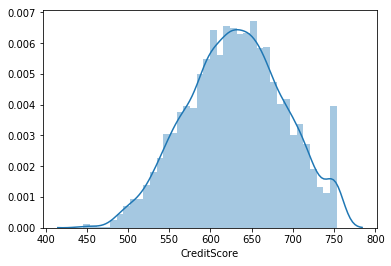

In [19]:
sns.distplot(data_2["CreditScore"], hist = True)

In [20]:
import numpy as np

In [21]:
(max(data_2["CreditScore"])-min(data_2["CreditScore"]))*0.8+min(data_2["CreditScore"])

691.6

In [24]:
data_2[data_2["CreditScore"]>=690]["Exited"].value_counts()

0    1109
1     272
Name: Exited, dtype: int64

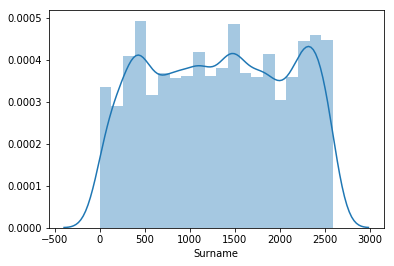

In [25]:
sns.distplot(data_2["Surname"], hist = True)

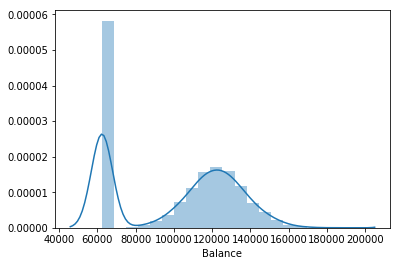

In [26]:
sns.distplot(data_2["Balance"], hist = True)

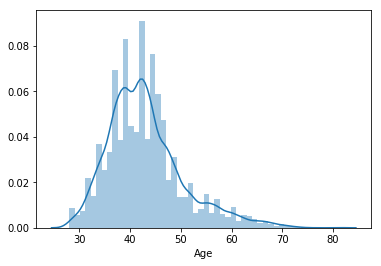

In [27]:
sns.distplot(data_2["Age"], hist = True)

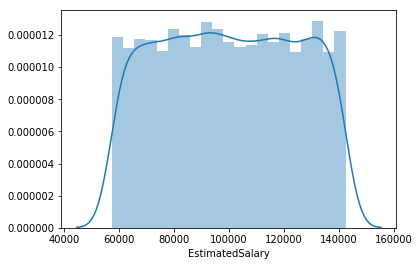

In [28]:
sns.distplot(data_2["EstimatedSalary"], hist = True)

In [29]:
(140000-60000)*0.8+60000

124000.0

In [30]:
data_2[data_2["EstimatedSalary"]>= 124000]["Exited"].value_counts()

0    1379
1     379
Name: Exited, dtype: int64

In [60]:
feature_name_3 = feature_name.copy()
feature_name_3.remove('RowNumber')
feature_name_3.remove('CustomerId')
feature_name_3.remove('Exited')
feature_name_3.remove('Geography')
feature_name_3.remove('Gender')
feature_name_3.remove('Tenure')
feature_name_3.remove('NumOfProducts')
feature_name_3.remove('HasCrCard')
feature_name_3.remove('IsActiveMember')

In [62]:
feature_name_3

['Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

### run model

In [31]:
data_3 = data_2.copy()

In [45]:
x = data_3.drop(columns = ["Exited","RowNumber","CustomerId"])
y = data_3["Exited"]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [46]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.8, random_state = 1039)

In [47]:
rd_classifier = RandomForestClassifier()
rd_classifier.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
pred_y = rd_classifier.predict(test_x)

In [49]:
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1430
           1       0.42      0.81      0.55       170

    accuracy                           0.86      1600
   macro avg       0.70      0.84      0.73      1600
weighted avg       0.92      0.86      0.88      1600



In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_y)

array([[1237,   32],
       [ 193,  138]], dtype=int64)